In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay

In [2]:
lifeExpectancy = pd.read_csv("datasets/life-expectancy.csv")

lifeExpectancy = lifeExpectancy.sample(frac=1, random_state=1)

print(lifeExpectancy.head())
print(lifeExpectancy.info())

      Gender  Height  Weight   BMI Physical_Activity Smoking_Status  \
9953    Male     179      96  30.0              High          Never   
3850  Female     156      66  27.1               Low         Former   
4962  Female     156      55  22.8            Medium          Never   
3886  Female     168      91  32.2               Low          Never   
5437    Male     176      78  25.2              High          Never   

     Alcohol_Consumption     Diet Blood_Pressure  Cholesterol  Diabetes  \
9953                 NaN  Average           High        180.4         0   
3850            Moderate  Average           High        205.7         0   
4962            Moderate  Average         Normal        187.5         0   
3886                 NaN  Average         Normal        261.8         0   
5437                 NaN  Average         Normal        184.9         0   

      Hypertension  Heart_Disease  Asthma   Age  
9953             0              0       0  69.6  
3850             0    

In [3]:
X_cat= lifeExpectancy.select_dtypes(include=["object", "string"]).columns
X_num = lifeExpectancy.select_dtypes(exclude=["object", "string"]).columns

features = lifeExpectancy.keys()
cat_features_ind =[0,4,5,6,7,8]
X_cat = [features[i] for i in cat_features_ind]
print("categorical:")
print(X_cat)
num_features_ind = [1,2,3,9,10,11,12,13]
X_num = [features[i] for i in num_features_ind]
print("numerical:")
print(X_num)

categorical:
['Gender', 'Physical_Activity', 'Smoking_Status', 'Alcohol_Consumption', 'Diet', 'Blood_Pressure']
numerical:
['Height', 'Weight', 'BMI', 'Cholesterol', 'Diabetes', 'Hypertension', 'Heart_Disease', 'Asthma']


In [4]:
lifeExpectancy[X_cat].nunique().to_frame().T

,Gender,Physical_Activity,Smoking_Status,Alcohol_Consumption,Diet,Blood_Pressure
0,2,3,3,2,3,3


### Creating pipelines for categorical and continuous columns

In [5]:
num_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())  
    ]
)

cat_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ]
)
preprocessor = ColumnTransformer(
    transformers = [
        ('num', num_transformer, X_num),
        ('cat', cat_transformer, X_cat)
    ]
)
y = lifeExpectancy["Age"]
X = preprocessor.fit_transform(lifeExpectancy)
print(np.shape(X))

(10000, 25)


### Creating a Decision Tree model and finding the best depth

In [6]:
from sklearn.tree import DecisionTreeRegressor

scores = []
depth_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]   # increasing max_depth values from 1 to 20

for i in depth_list:
    model = DecisionTreeRegressor(max_depth=i, random_state=1)
    cv_score = cross_val_score(model, X, y, cv=10, scoring='r2').mean().round(4)
    scores.append(cv_score)
    
best_score = np.max(scores)
best_idx = np.argmax(scores)
best_depth = depth_list[best_idx]

print('Best CV R^2 Score:', best_score)
print('Best Max Depth:', best_depth)

Best CV R^2 Score: 0.718
Best Max Depth: 12


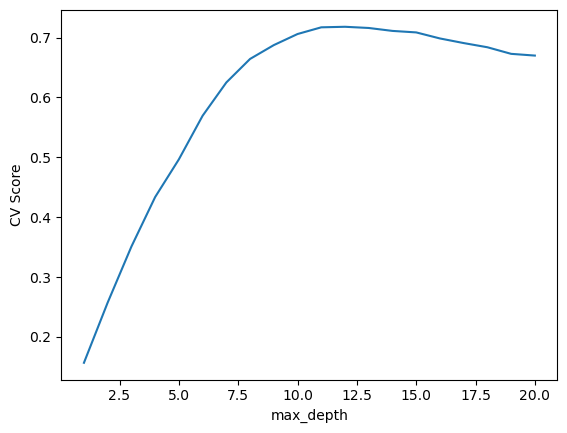

In [7]:
plt.plot(depth_list, scores)
plt.xlabel('max_depth')
plt.ylabel('CV Score')
plt.show()